<a href="https://colab.research.google.com/github/Amrutha-Tsavatapalli/ACM-work/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
data = load_breast_cancer()
print("Dataset Description:\n", data.DESCR)
X = data.data
y = data.target
print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape)

Dataset Description:
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is

In [ ]:

import pandas as pd
df = pd.DataFrame(data.data,columns = data.feature_names)
print(df.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
missing_values = df.isnull().sum() ## checking for the missing values
print(missing_values)



mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [ ]:
## no missing values

In [ ]:
df['target'] = data.target


In [ ]:
scaler = StandardScaler()
X = df.drop(columns=['target'])  #standardize the features
## mean of 0 and a standard deviation of 1....cuz to normalise all the units if at all different units are present.
##Makes all the features into same scale.
y = df['target']

In [ ]:
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
##no need to handle the categorical variables since the target is already numeric.
## here the target is either one or zero.

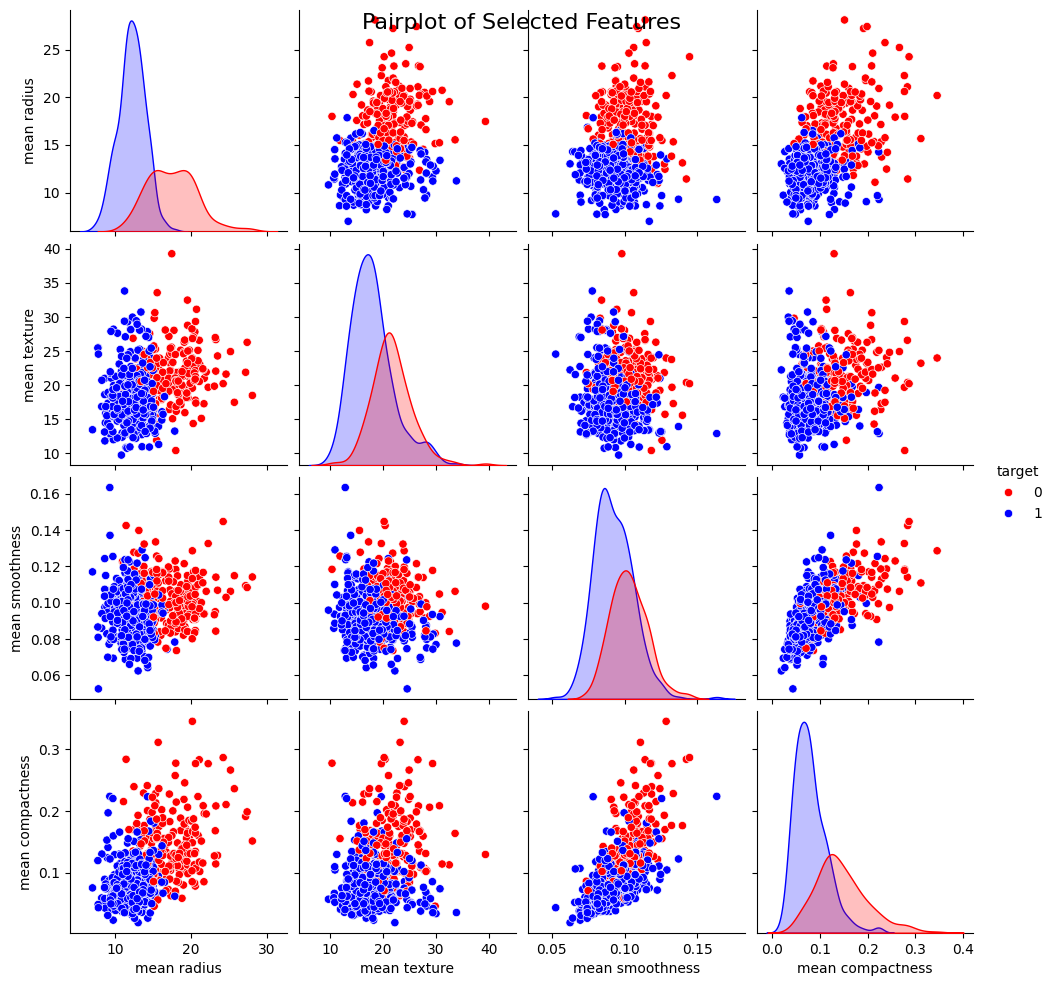

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
##DATA VISUALISATION
## plot to understand the correlation between the features
sns.pairplot(df[['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'target']], hue='target', palette={0: 'red', 1: 'blue'})
plt.suptitle("Pairplot of Selected Features", fontsize=16)
plt.show()

<ipython-input-17-6d2a1053e78b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


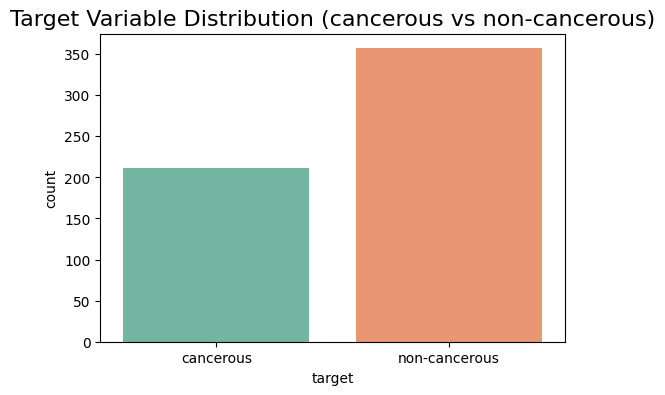

In [ ]:
##plot for target distribution (cancerous vs non-cancerous)
##DATA  VISUALISATION
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Target Variable Distribution (cancerous vs non-cancerous)", fontsize=16)
plt.xticks([0, 1], ['cancerous', 'non-cancerous'])
plt.show()

In [ ]:
# Split - training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (455, 30)
Testing set shape: (114, 30)


In [ ]:
## training the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Model Coefficients: [[ 2.24342409e+00  1.44731486e-01 -1.77839084e-01  1.14788156e-03
  -2.46925835e-01 -3.30837402e-01 -8.42028546e-01 -5.91867511e-01
  -3.07832652e-01 -7.73704163e-03 -1.27365187e-01  7.46511083e-01
   3.31964875e-03 -8.10058222e-02 -4.28415195e-02  2.02651323e-01
   1.20447495e-01 -5.78417496e-02 -3.85675475e-02  3.53056214e-02
   7.41817586e-01 -3.74296405e-01 -6.04173691e-02 -2.14755145e-02
  -4.72646116e-01 -6.55027103e-01 -1.64324357e+00 -9.38667113e-01
  -1.10583862e+00 -4.36926794e-02]]
Intercept: [6.30140167]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Making predictions on the test data
y_pred = model.predict(X_test)
# Displaying the  predictions
print("Predictions:", y_pred)


Predictions: [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]


In [ ]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
# Displaying classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -

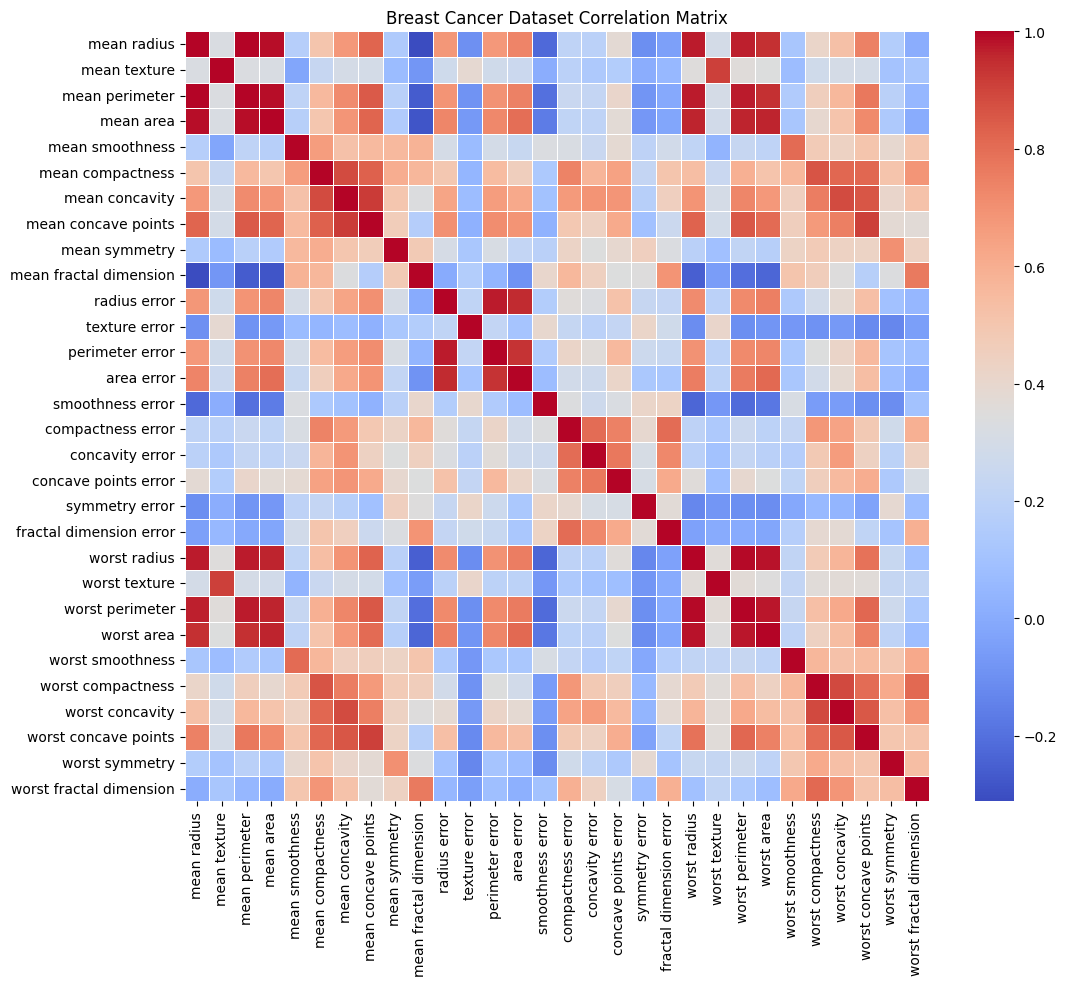

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns = data.feature_names)
##calculating or initialising the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Breast Cancer Dataset Correlation Matrix")
plt.show()